<a href="https://colab.research.google.com/github/Mukul1Panwar/Machine_Learning/blob/main/Customer_Churn_pred(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df1 = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
label_encoder = {}  # create a dict. for streamlit ui (in that case we will reterive the orignal form of columns)

for col in df1.columns:
  if df1[col].dtype == 'object':
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoder[col] = le

In [ ]:
print(label_encoder['PaperlessBilling'].classes_)

['No' 'Yes']


In [ ]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
df1.corr()['Churn'].sort_values(ascending=True)

,Churn
Contract,-0.396713
tenure,-0.352229
OnlineSecurity,-0.289309
TechSupport,-0.282492
OnlineBackup,-0.195525
DeviceProtection,-0.178134
Dependents,-0.164221
Partner,-0.150448
InternetService,-0.047291
StreamingMovies,-0.038492


In [ ]:
df2 = df1[['SeniorCitizen','TotalCharges','MultipleLines','PaymentMethod','PaperlessBilling','MonthlyCharges','Churn']]

In [ ]:
type(df2)

pandas.core.frame.DataFrame

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df3 = df[['SeniorCitizen','TotalCharges','MultipleLines','PaymentMethod','PaperlessBilling','MonthlyCharges','Churn']]

In [ ]:
df3.shape

(7043, 7)

In [ ]:
type(df3)

pandas.core.frame.DataFrame

<Axes: xlabel='PaperlessBilling', ylabel='count'>

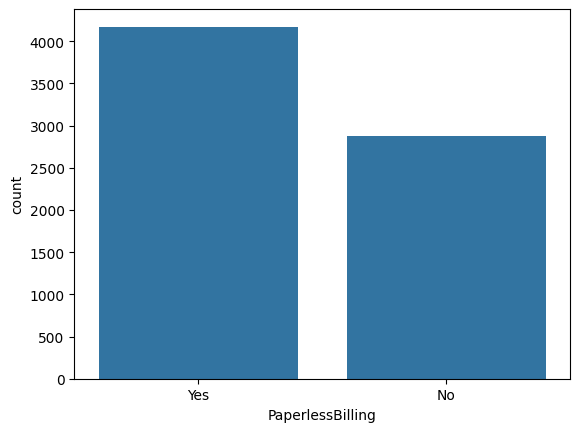

In [ ]:
sns.countplot(df3,x=df3['PaperlessBilling'])

<Axes: xlabel='PaymentMethod', ylabel='count'>

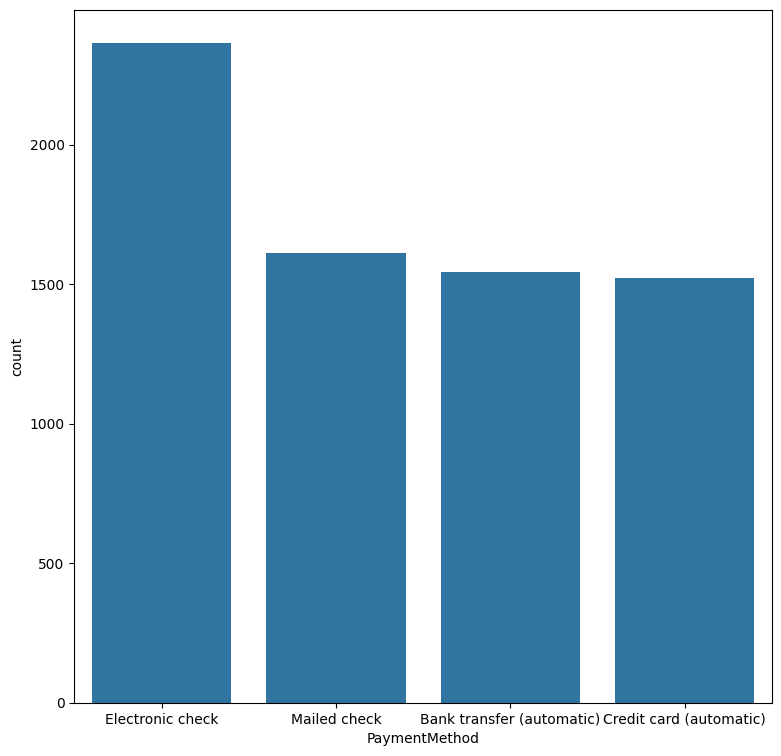

In [ ]:
plt.figure(figsize=(9,9))
sns.countplot(df3,x=df3['PaymentMethod'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df2.iloc[:,:6]
y = df2.iloc[:,-1]


In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(
  x,y,test_size=0.2,random_state=45
)

In [ ]:
Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape

((5634, 6), (5634,), (1409, 6), (1409,))

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
Xtrain = st.fit_transform(Xtrain)
Xtest = st.fit_transform(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score

Best k: 18
Best testing accuracy: 0.7850


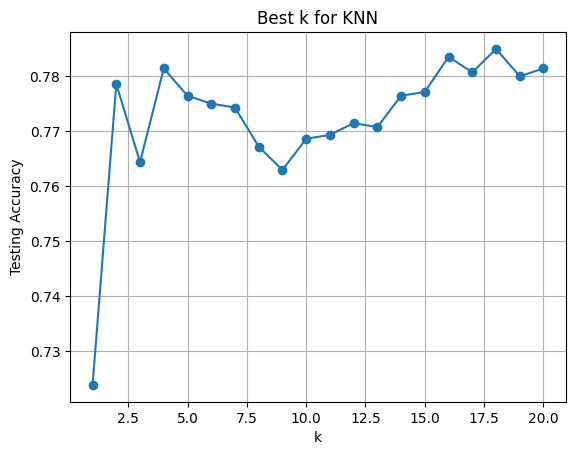

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

best_k = 1
best_score = 0
k_values= range(1,21)
scores=[]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, Ytrain)
    y_pred = knn.predict(Xtest)
    acc = accuracy_score(Ytest, y_pred)
    scores.append(acc)

    if acc > best_score:
        best_score = acc
        best_k = k

print(f"Best k: {best_k}")
print(f"Best testing accuracy: {best_score:.4f}")

plt.plot(k_values, scores, marker='o')
plt.xlabel("k")
plt.ylabel("Testing Accuracy")
plt.title("Best k for KNN")
plt.grid()
plt.show()


In [ ]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=18)

In [ ]:
print("training score:",final_knn.score(Xtrain,Ytrain))
print("testing score:",final_knn.score(Xtest,Ytest))

training score: 0.7781327653532126
testing score: 0.7849538679914834


In [ ]:
input_data = [0,2646,	2,	2,	1,	104.80 ]
input_data_array = np.asarray(input_data)
input_data_reshape = input_data_array.reshape(1,-1)

prediction = knn.predict(input_data_reshape)
probability = knn.predict_proba(input_data_reshape)

print("Predicted class:", prediction)
print("Churn probability (Yes):", probability[0][1])
print("Churn probability (No):", probability[0][0])

Predicted class: [1]
Churn probability (Yes): 0.55
Churn probability (No): 0.45
